In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('c:\\Users\\HP\\Desktop\\full_cleaned_data.csv')


1. Basic Overview :
Identify the structure of the dataset, new columns, and inspect the first few rows.

In [2]:
# Basic Overview
print("Dataset Shape:", data.shape)
print("\nColumns:\n", data.columns)

# Data Types and Missing Values
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nPercentage of Missing Values:\n", (data.isnull().sum() / len(data)) * 100)

# Display first few rows
print("\nSample Data:\n", data.head())


Dataset Shape: (2498, 15)

Columns:
 Index(['linkedinProfileUrl', 'email', 'headline', 'location', 'firstName',
       'lastName', 'phoneNumber', 'company', 'companyWebsite', 'allSkills',
       'companyLinkedInUrl', 'companyEmployeeCount', 'createdTime', 'country',
       'uniqueId'],
      dtype='object')

Data Types:
 linkedinProfileUrl      object
email                   object
headline                object
location                object
firstName               object
lastName                object
phoneNumber             object
company                 object
companyWebsite          object
allSkills               object
companyLinkedInUrl      object
companyEmployeeCount    object
createdTime             object
country                 object
uniqueId                object
dtype: object

Missing Values:
 linkedinProfileUrl      0
email                   0
headline                0
location                0
firstName               0
lastName                0
phoneNumber             

2. Missing Value Analysis :
Focus on missing patterns, especially for the new country column.


Missing Values:
 linkedinProfileUrl      0
email                   0
headline                0
location                0
firstName               0
lastName                0
phoneNumber             0
company                 0
companyWebsite          0
allSkills               0
companyLinkedInUrl      0
companyEmployeeCount    0
createdTime             0
country                 0
uniqueId                0
dtype: int64

Missing Values Percentage:
 linkedinProfileUrl      0.0
email                   0.0
headline                0.0
location                0.0
firstName               0.0
lastName                0.0
phoneNumber             0.0
company                 0.0
companyWebsite          0.0
allSkills               0.0
companyLinkedInUrl      0.0
companyEmployeeCount    0.0
createdTime             0.0
country                 0.0
uniqueId                0.0
dtype: float64


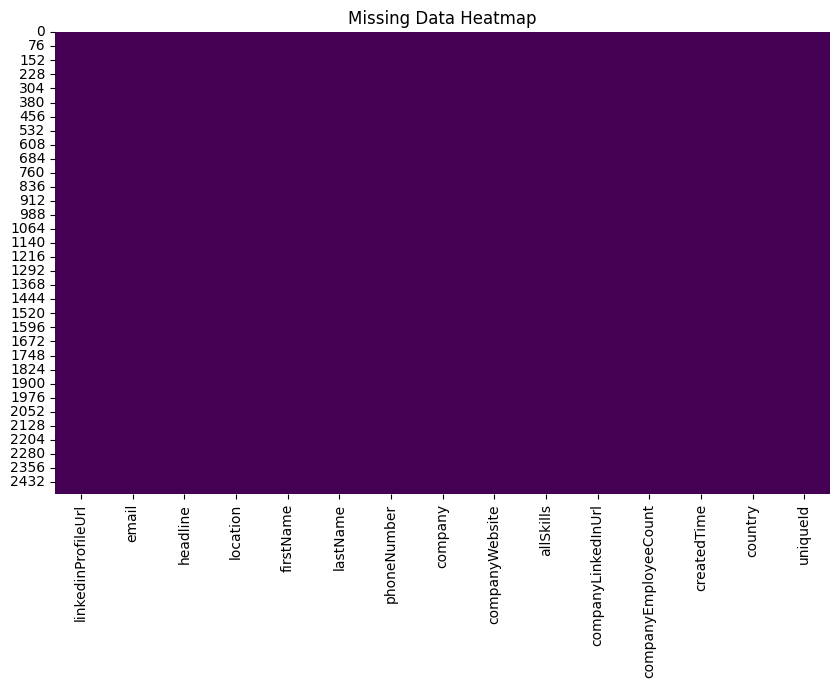

In [3]:
# Count of missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(data)) * 100
print("\nMissing Values Percentage:\n", missing_percentage)

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


3.Summary for columns:

In [36]:
# Convert potential numerical columns
data['companyEmployeeCount'] = pd.to_numeric(data['companyEmployeeCount'], errors='coerce')


In [10]:
# Example: Assume `data` is your DataFrame
numerical_columns = data.select_dtypes(include=['number'])  # Select only numerical columns
print("\nNumerical Columns Summary:\n", numerical_columns.describe())





Numerical Columns Summary:
        companyEmployeeCount
count           2494.000000
mean              51.876103
std              342.456241
min                0.000000
25%                3.000000
50%                9.000000
75%               24.000000
max             9900.000000


In [11]:

# Summary for categorical columns
print("\nCategorical Columns Summary:\n", data.describe(include=['object']))


Categorical Columns Summary:
        linkedinProfileUrl    email       headline  \
count                2498     2498           2498   
unique               2493     2494           2258   
top               Unknown  Unknown  Founder & CEO   
freq                    6        4             51   

                           location firstName lastName phoneNumber  company  \
count                          2498      2498     2498        2498     2498   
unique                          161      1592     1815        1194     2443   
top     Dubai, United Arab Emirates  Muhammad     Chan     Unknown  Unknown   
freq                            594        31       37        1301        3   

              companyWebsite  \
count                   2498   
unique                  2447   
top     http://www.klook.com   
freq                       3   

                                                allSkills companyLinkedInUrl  \
count                                                2498         

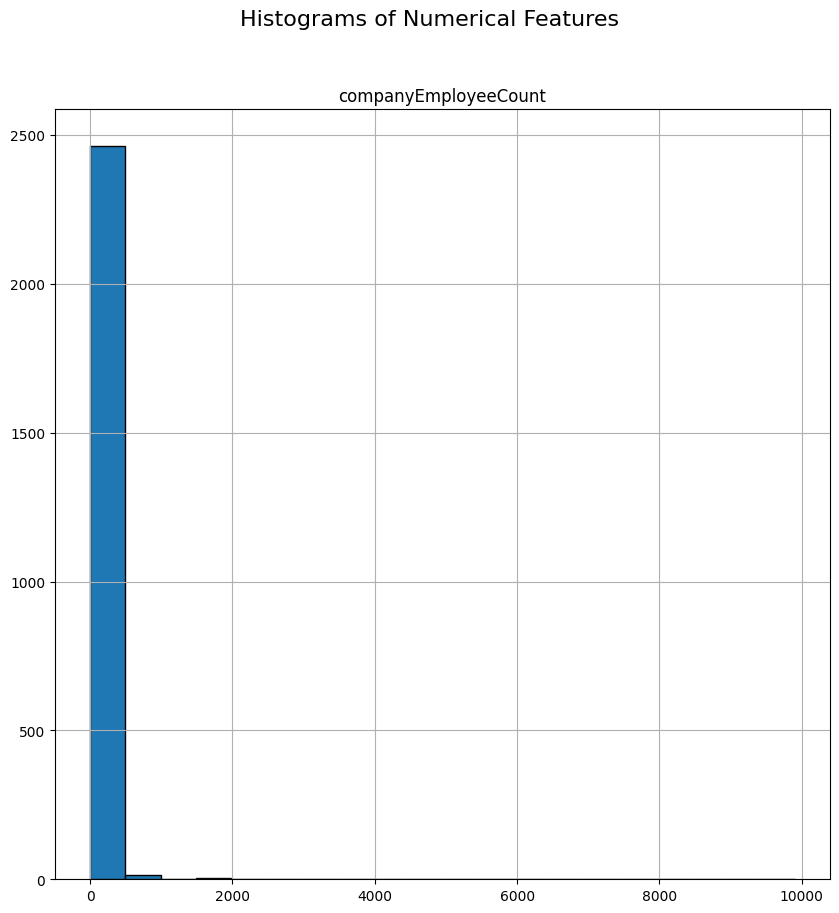

In [15]:
# Plot histograms for numerical features
data[numerical_columns].hist(figsize=(10, 10), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()



In [41]:

# Define the bin edges for companyEmployeeCount (example ranges)
bin_edges = [0, 10, 50, 200, 500, 1000, 5000, 10000]

# Define the bin labels for each range
bin_labels = ['0-10', '11-50', '51-200', '201-500', '501-1000', '1001-5000', '5001+']

# Apply binning to the companyEmployeeCount column
data['companyEmployeeCount_binned'] = pd.cut(data['companyEmployeeCount'], bins=bin_edges, labels=bin_labels)

# Display the binning results
print(data[['companyEmployeeCount', 'companyEmployeeCount_binned']].head(8))





   companyEmployeeCount companyEmployeeCount_binned
0                   9.0                        0-10
1                  35.0                       11-50
2                  15.0                       11-50
3                   3.0                        0-10
4                 340.0                     201-500
5                 130.0                      51-200
6                  24.0                       11-50
7                  25.0                       11-50


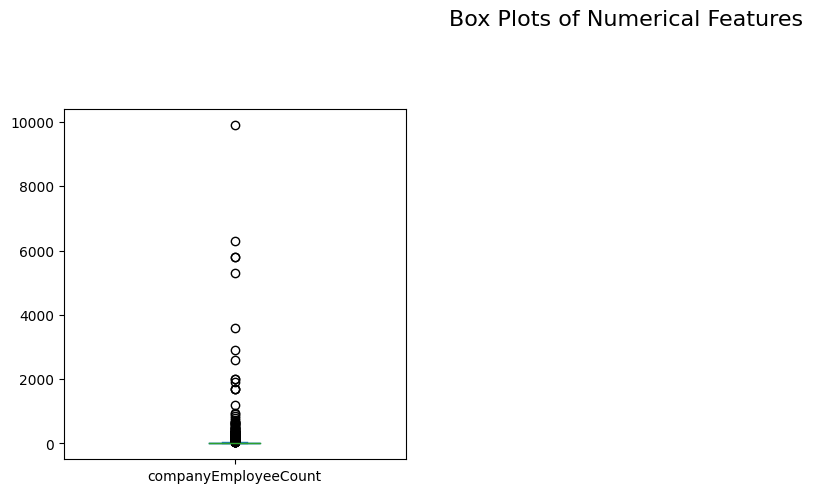

In [14]:
# Box plots for numerical features
data[numerical_columns].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle("Box Plots of Numerical Features", fontsize=16)
plt.show()

3. Categorical Features Analysis :



In [17]:
# categorical_columns = ['country', 'connectionDegree', 'connectionDegree', 'isOpenToWork', 'isHiring', 'phoneNumber', 'companyEmployeeCount']

# for col in categorical_columns:
#     print(f"\n{col} - Unique Values: {data[col].nunique()}")
#     print(data[col].value_counts(dropna=False))

#     plt.figure(figsize=(12, 6))
#     data[col].value_counts(dropna=False).plot(kind='bar', color='skyblue')
#     plt.title(f"Distribution of {col}")
#     plt.xlabel(col)
#     plt.ylabel("Count")
#     plt.xticks(rotation=45)
#     plt.show()


In [19]:
# # Automatically identify categorical columns
# categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# # Optional: Filter columns with a manageable number of unique values
# # You can adjust the threshold based on your dataset size
# # max_unique_threshold = 50
# # categorical_columns = [
# #     col for col in categorical_columns if data[col].nunique() <= max_unique_threshold
# # ]

# # Visualize the distribution of each categorical column
# for col in categorical_columns:
#     print(f"\n{col} - Unique Values: {data[col].nunique()}")
#     print(data[col].value_counts(dropna=False))

#     plt.figure(figsize=(12, 6))
#     data[col].value_counts(dropna=False).plot(kind='bar', color='skyblue')
#     plt.title(f"Distribution of {col}", fontsize=16)
#     plt.xlabel(col, fontsize=14)
#     plt.ylabel("Count", fontsize=14)
#     plt.xticks(rotation=45, fontsize=12)
#     plt.tight_layout()
#     plt.show()



linkedinProfileUrl - Unique Values: 2493
linkedinProfileUrl
Unknown                                               6
http://www.linkedin.com/in/brian-m-53599a76           1
http://www.linkedin.com/in/yahya-humayun-a6a721107    1
http://www.linkedin.com/in/jessie-wong-aa4208218      1
http://www.linkedin.com/in/duncanjohnstonwatt         1
http://www.linkedin.com/in/syeda-anam-hassan          1
http://www.linkedin.com/in/karamba-jabbie-51938b71    1
http://www.linkedin.com/in/jane-zheng-0aaa55244       1
http://www.linkedin.com/in/philingram                 1
http://www.linkedin.com/in/henry-lee-b86a6055         1
Name: count, dtype: int64


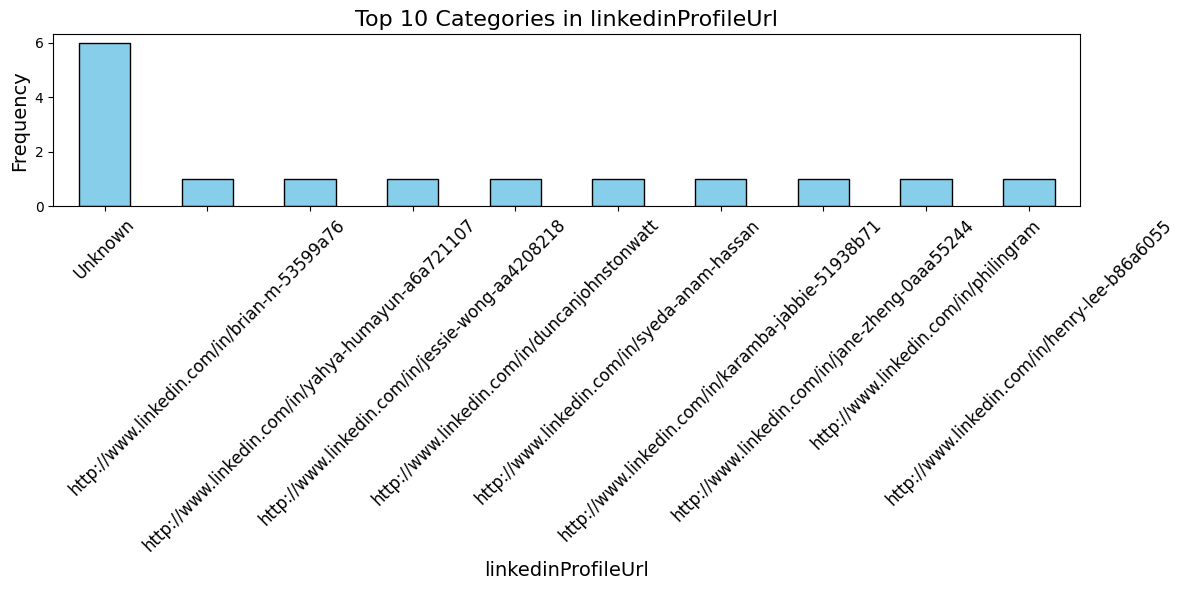


email - Unique Values: 2494
email
Unknown                        4
kushal@publshme.com            2
brian@credify.africa           1
vitaly@buzzoola.com            1
syeda.hassan@treslogics.com    1
karambaj@rsamade.co.za         1
janezheng@beliefbiomed.com     1
phil@superultra.io             1
henrylee@jobmatriz.com         1
yahya@thepattern.app           1
Name: count, dtype: int64


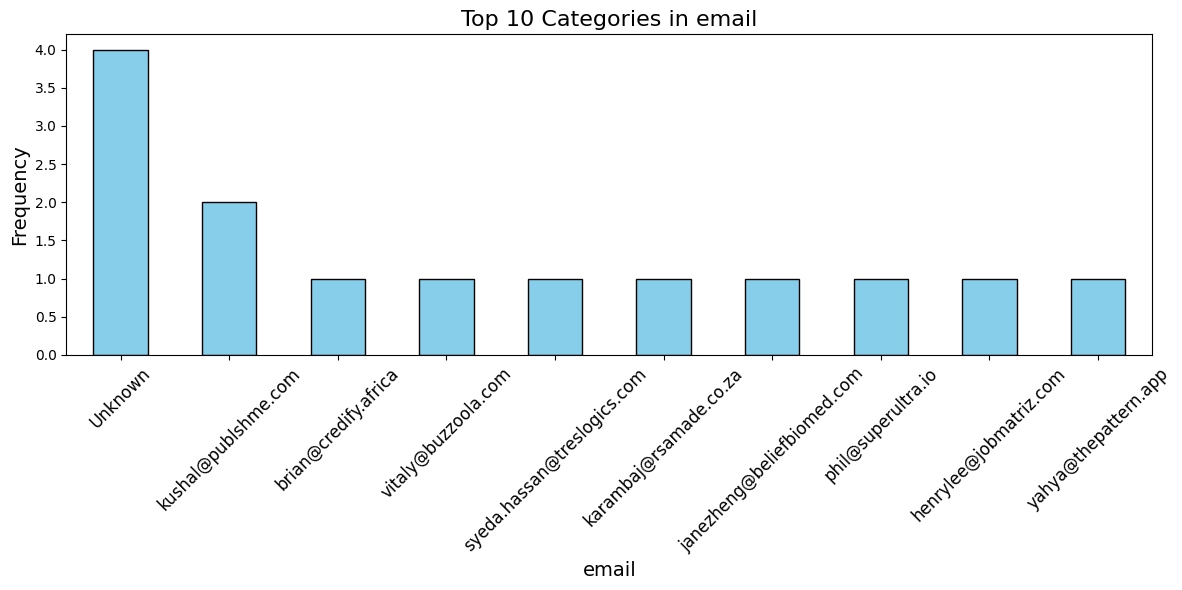


headline - Unique Values: 2258
headline
Founder & CEO       51
Unknown             31
Founder and CEO     22
CEO & Founder       18
Co-Founder & CEO    18
Founder             12
Co-Founder & CTO     8
Co-Founder & COO     8
CEO & Co-Founder     7
CEO                  7
Name: count, dtype: int64


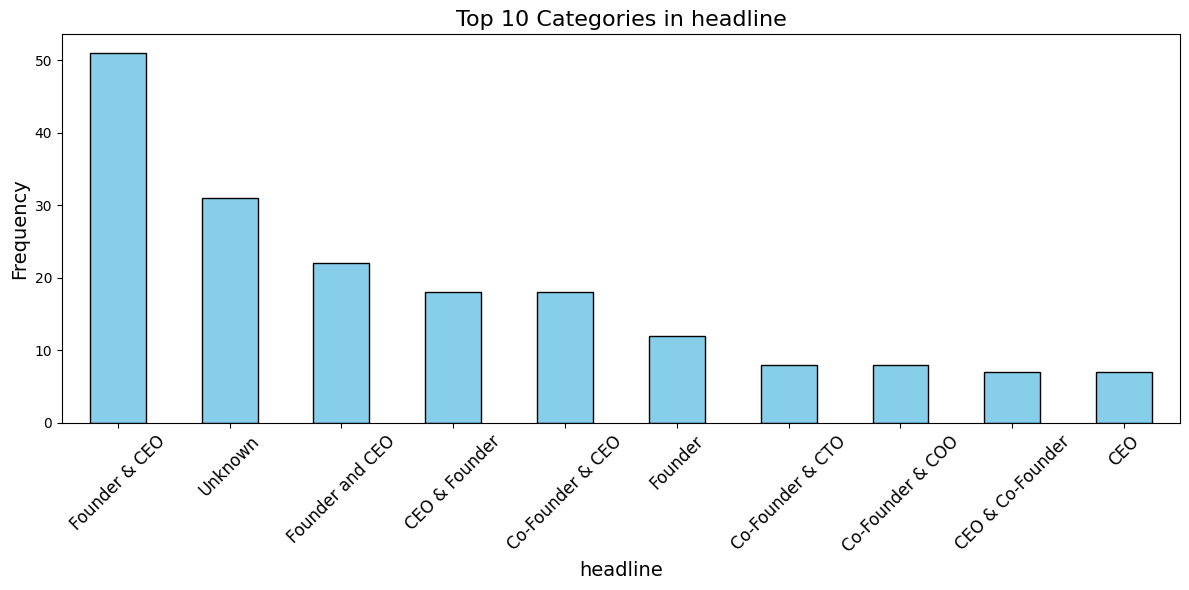


location - Unique Values: 161
location
Dubai, United Arab Emirates                      594
Hong Kong SAR                                    288
Hong Kong, Hong Kong SAR                         244
United Arab Emirates                             146
City of Johannesburg, Gauteng, South Africa      118
Riyadh, Saudi Arabia                             108
City of Cape Town, Western Cape, South Africa     90
Pakistan                                          74
Saudi Arabia                                      62
Lahore District, Punjab, Pakistan                 46
Name: count, dtype: int64


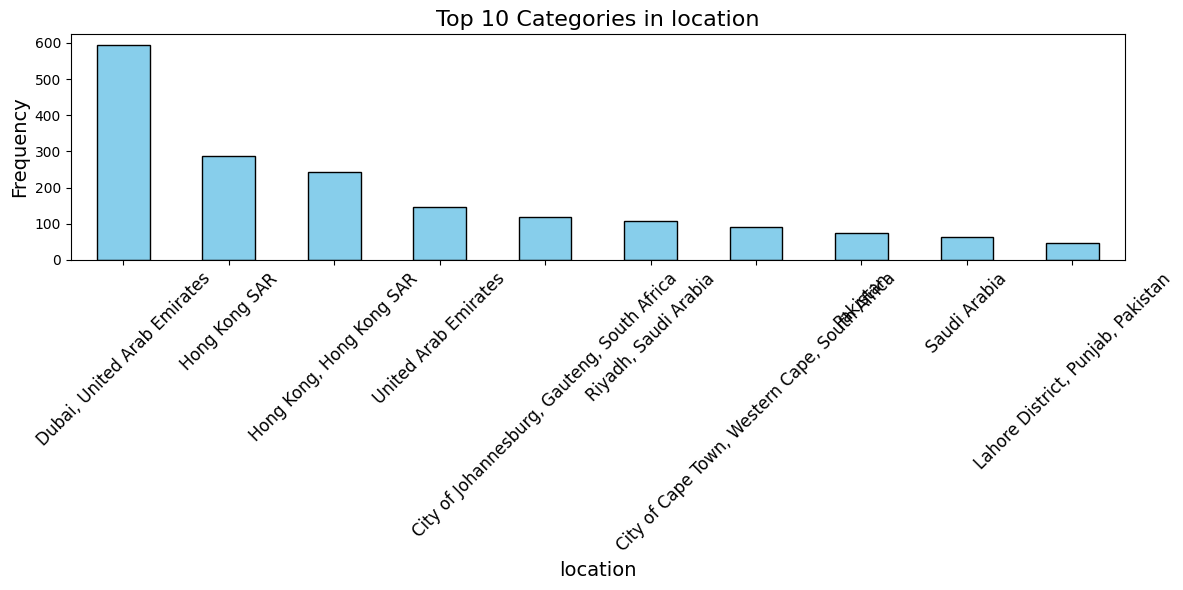


company - Unique Values: 2443
company
Unknown               3
Klook                 3
Open Innovation AI    2
TerraPay              2
MediConCen            2
سويتر | Sweater       2
Alea 💚                2
Raj Solar             2
Metalpha              2
Sauda Store           2
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_14880\3513355982.py:24: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


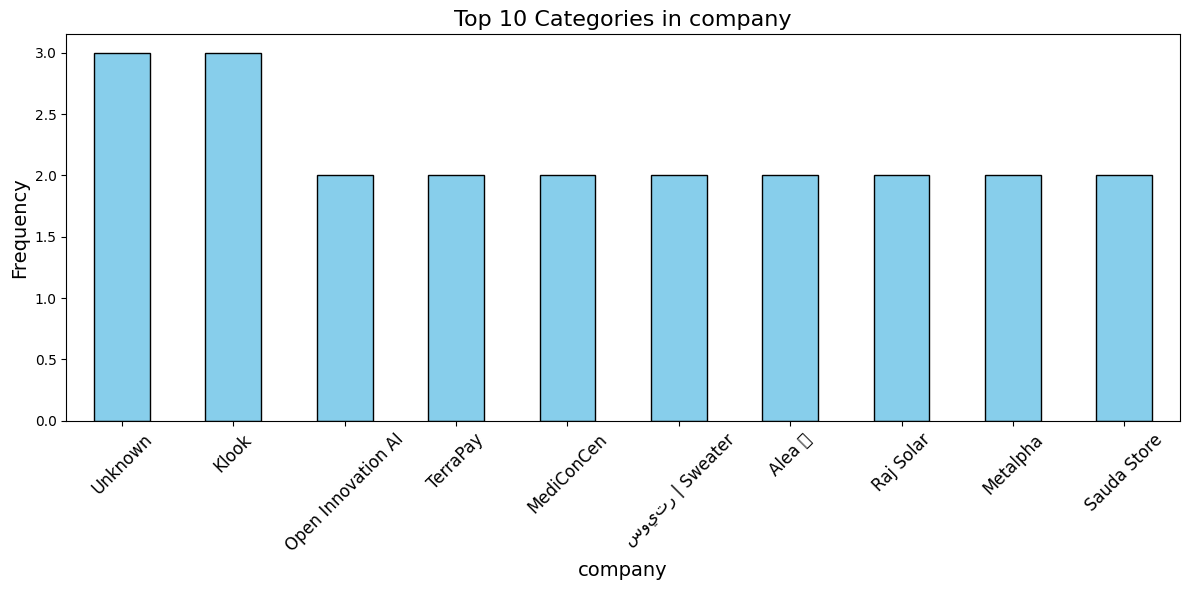


companyWebsite - Unique Values: 2447
companyWebsite
http://www.klook.com                3
http://www.unityretail.com          2
http://www.custonomy.io             2
http://www.angelflow.vc             2
http://www.wati.io                  2
http://www.briefco.co.za            2
http://www.meattn.com               2
http://www.sauda.store              2
http://www.endovisionai.com         2
http://www.reflectivelearning.co    2
Name: count, dtype: int64


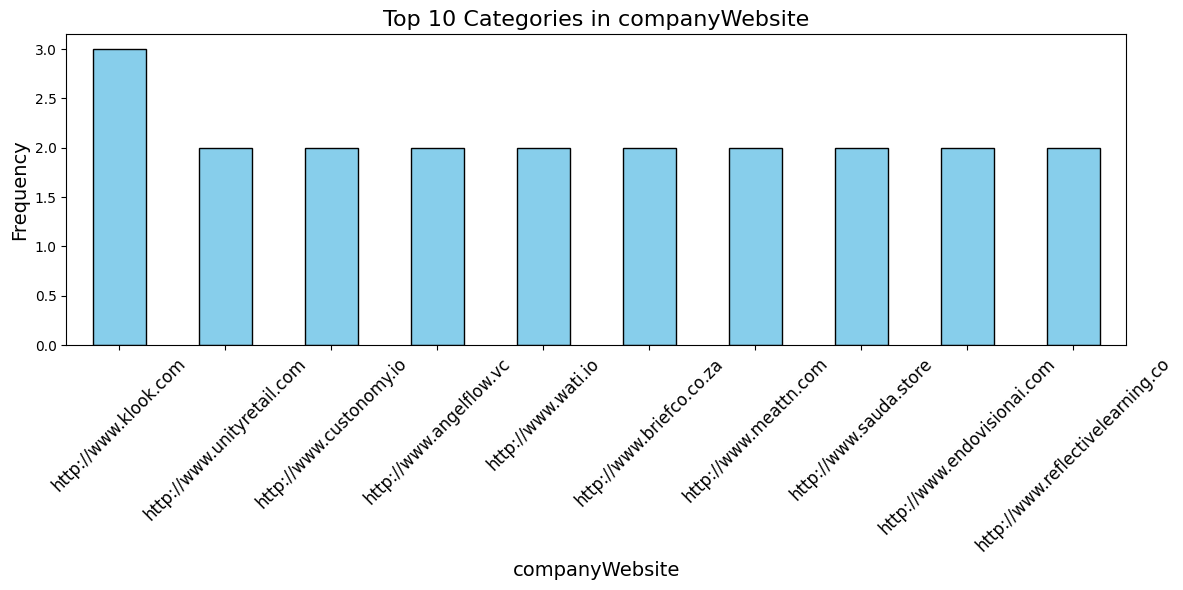


companyLinkedInUrl - Unique Values: 2440
companyLinkedInUrl
Unknown                                                       7
http://www.linkedin.com/company/klook                         3
http://www.linkedin.com/company/wearecollectiv                2
http://www.linkedin.com/company/watiglobal                    2
http://www.linkedin.com/company/sauda-store                   2
http://www.linkedin.com/company/meat-the-next                 2
http://www.linkedin.com/company/angelflow                     2
http://www.linkedin.com/company/endovision-ai-in-endoscopy    2
http://www.linkedin.com/company/reflectivelearning            2
http://www.linkedin.com/company/custonomy                     2
Name: count, dtype: int64


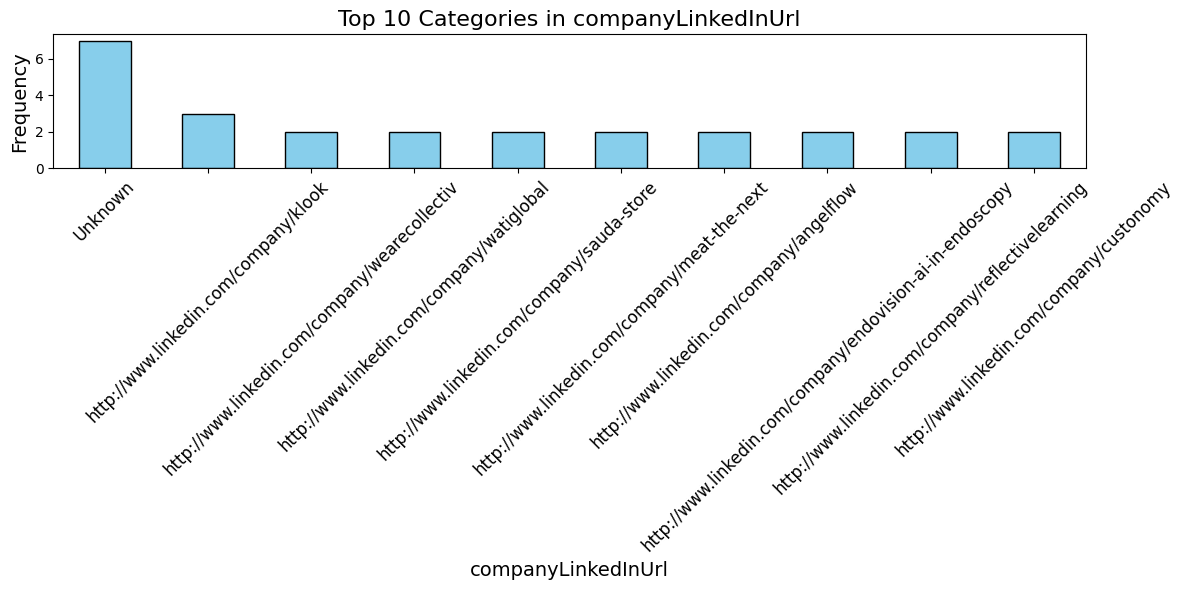


country - Unique Values: 8
country
United Arab Emirates    820
Hong Kong               595
South Africa            286
Pakistan                256
Saudi Arabia            215
China                   164
Unknown                 131
Qatar                    31
Name: count, dtype: int64


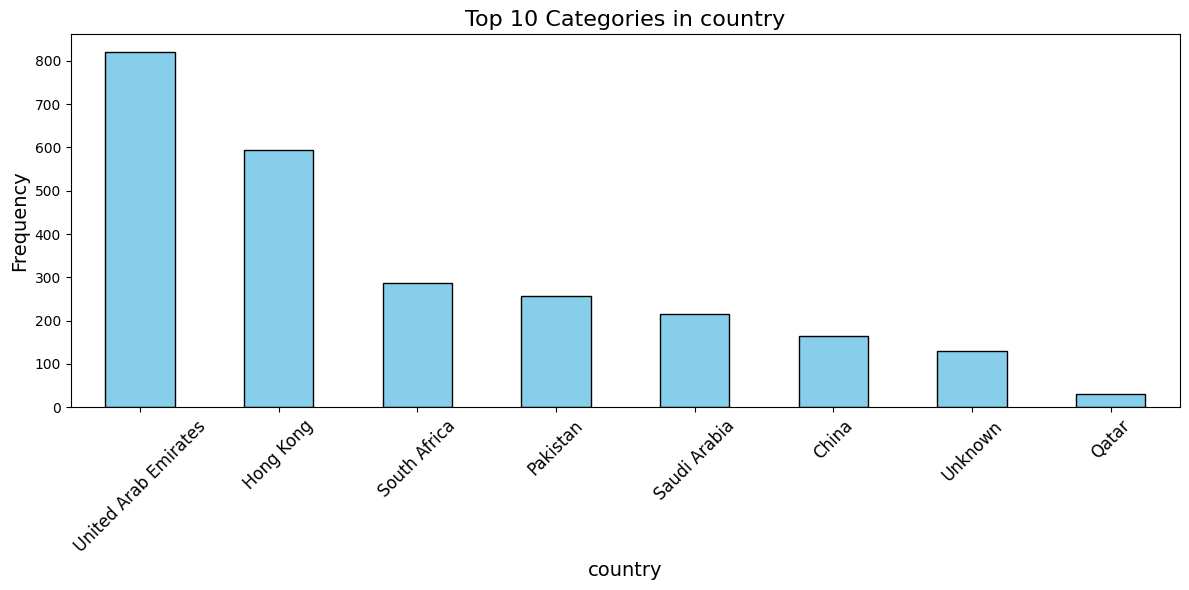

In [24]:
import matplotlib.pyplot as plt

# Define columns of interest (categorical data)
categorical_columns = [
    'linkedinProfileUrl', 'email', 'headline', 'location', 'company',
    'companyWebsite', 'companyLinkedInUrl', 'country']

# Loop through the columns and visualize their distributions
for col in categorical_columns:
    # Get value counts for the column
    value_counts = data[col].value_counts(dropna=False)

    # Display summary
    print(f"\n{col} - Unique Values: {value_counts.shape[0]}")
    print(value_counts.head(10))  # Display top 10 values for brevity

    # Plot bar chart for top 10 categories
    plt.figure(figsize=(12, 6))
    value_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 10 Categories in {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()


4. Text Data Analysis :
Analyze text-heavy columns (description, headline, allSkills).
Extend analysis to country for geographic insights.

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


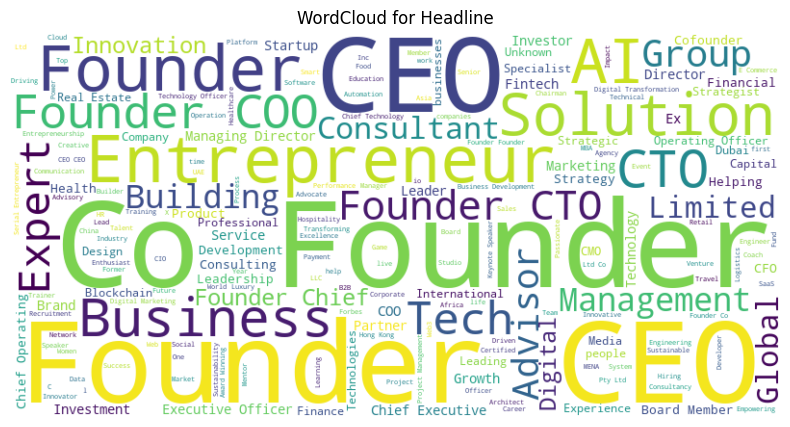

In [30]:
from wordcloud import WordCloud

# Generate WordCloud for the 'description' column
text_data = ' '.join(data['headline'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Headline")
plt.show()



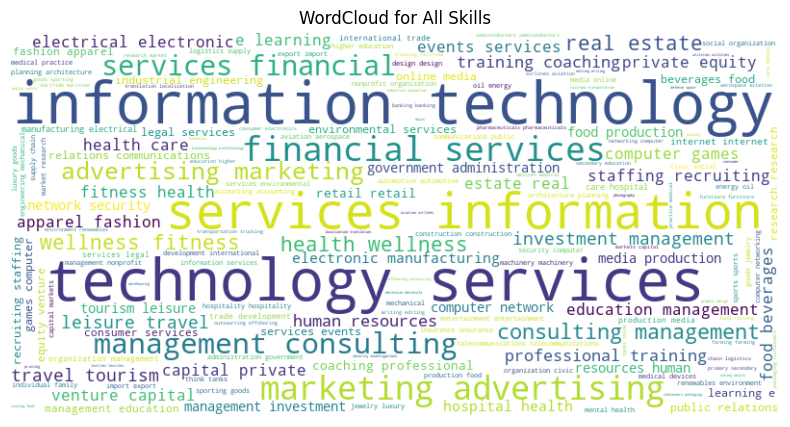

In [32]:
# Generate WordCloud for the 'description' column
text_data = ' '.join(data['allSkills'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for All Skills")
plt.show()

5. Numerical Features Analysis :

Analyze companyEmployeeCount, jobStartedSince, birthday, and other numerical data.


Numerical Columns Summary:
        companyEmployeeCount
count           2494.000000
mean              51.876103
std              342.456241
min                0.000000
25%                3.000000
50%                9.000000
75%               24.000000
max             9900.000000


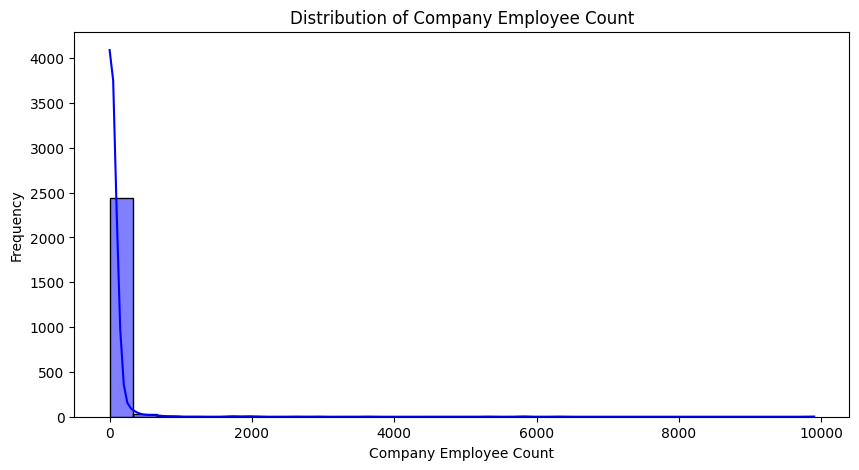

In [33]:
# # Converting columns to datetime if needed
# data['jobStartedSince'] = pd.to_datetime(data['jobStartedSince'], errors='coerce')
# data['birthday'] = pd.to_datetime(data['birthday'], errors='coerce')

# Numerical Columns Summary
numerical_columns = ['companyEmployeeCount']
print("\nNumerical Columns Summary:\n", data[numerical_columns].describe())

# Distribution of 'companyEmployeeCount'
plt.figure(figsize=(10, 5))
sns.histplot(data['companyEmployeeCount'].dropna(), kde=True, bins=30, color='blue')
plt.title("Distribution of Company Employee Count")
plt.xlabel("Company Employee Count")
plt.ylabel("Frequency")
plt.show()


6. Country-Level Insights :

Analyze hiring trends (isHiring) and open-to-work (isOpenToWork) statistics by country.

7. Correlation Analysis :

Analyze numerical correlations for features like companyEmployeeCount

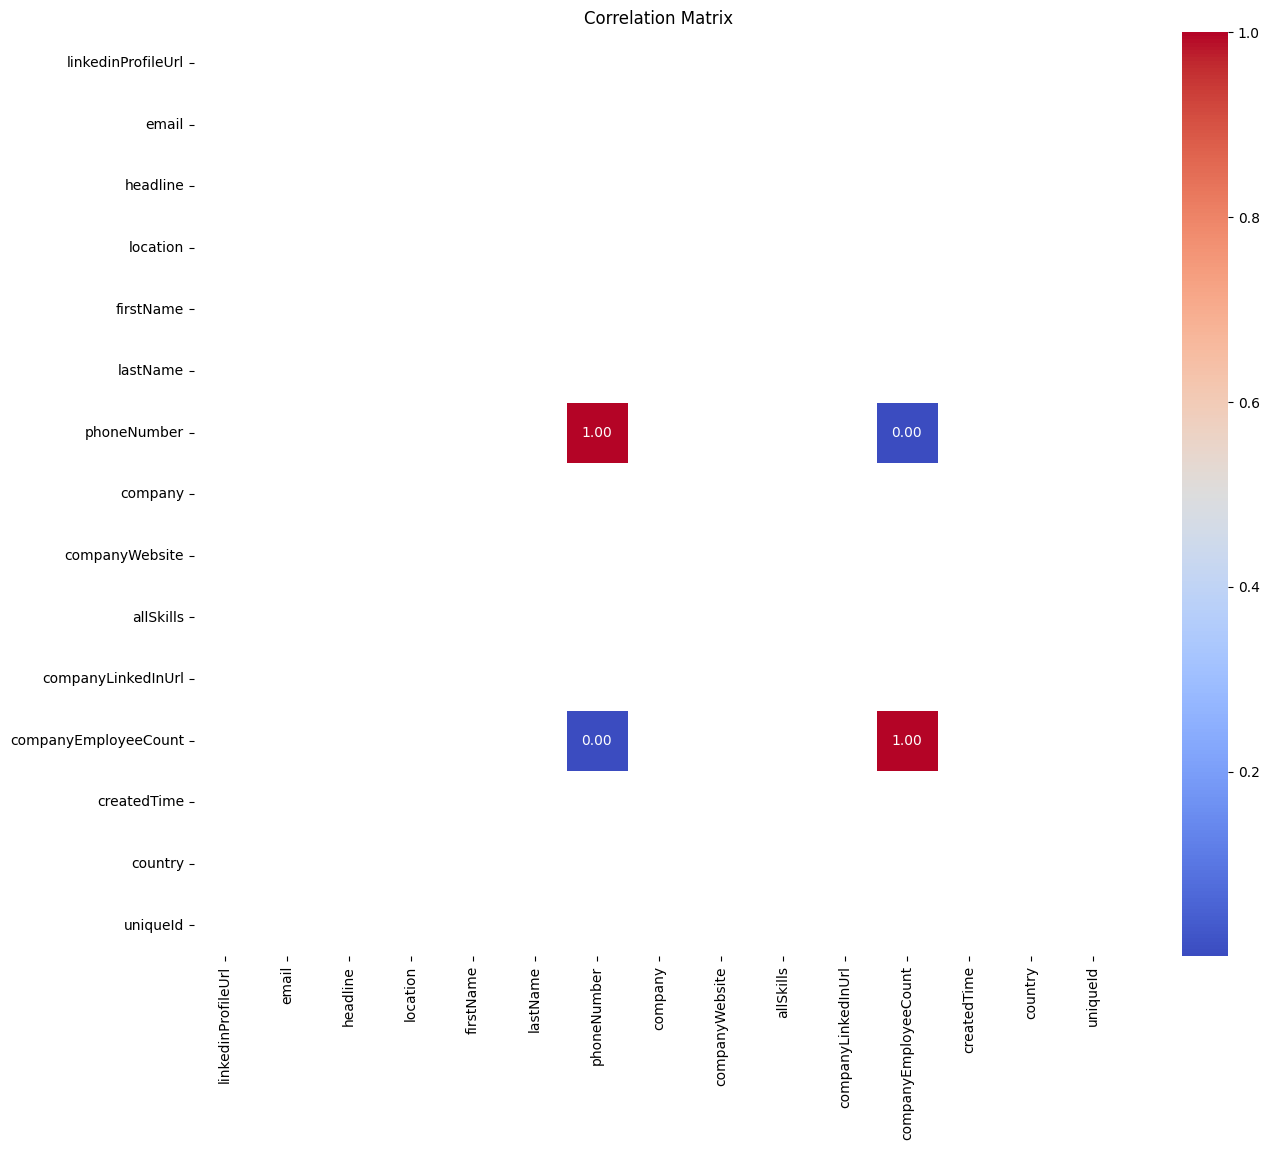

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Replace non-numeric values in numeric columns with NaN
data_cleaned = data.copy()

for col in data.columns:
    if data[col].dtype == 'object':
        try:
            # Attempt to convert to numeric; replace errors with NaN
            data_cleaned[col] = pd.to_numeric(data[col], errors='coerce')
        except:
            continue

# Identify numerical columns after conversion
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Check for empty numerical data
if numerical_columns.empty:
    print("No numeric columns available for correlation matrix.")
else:
    # Compute correlation matrix
    correlation_matrix = data_cleaned[numerical_columns].corr()

    # Plot heatmap if matrix is not empty
    if not correlation_matrix.empty:
        plt.figure(figsize=(15, 12))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Correlation Matrix")
        plt.show()
    else:
        print("No correlations found in the numerical data.")


8. Unique Identifiers and Duplicate Analysis :
Validate uniqueness of uniqueId and other identifying columns.

In [34]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

# Check unique values for 'uniqueId'
unique_ids = data['uniqueId'].nunique()
print(f"Number of Unique IDs: {unique_ids}")


Number of Duplicate Rows: 0
Number of Unique IDs: 2498



linkedinProfileUrl - Unique Values: 2492
linkedinProfileUrl
http://www.linkedin.com/in/brian-m-53599a76           1
http://www.linkedin.com/in/yahya-humayun-a6a721107    1
http://www.linkedin.com/in/jessie-wong-aa4208218      1
http://www.linkedin.com/in/duncanjohnstonwatt         1
http://www.linkedin.com/in/syeda-anam-hassan          1
http://www.linkedin.com/in/karamba-jabbie-51938b71    1
http://www.linkedin.com/in/jane-zheng-0aaa55244       1
http://www.linkedin.com/in/philingram                 1
http://www.linkedin.com/in/henry-lee-b86a6055         1
http://www.linkedin.com/in/pinwang                    1
Name: count, dtype: int64


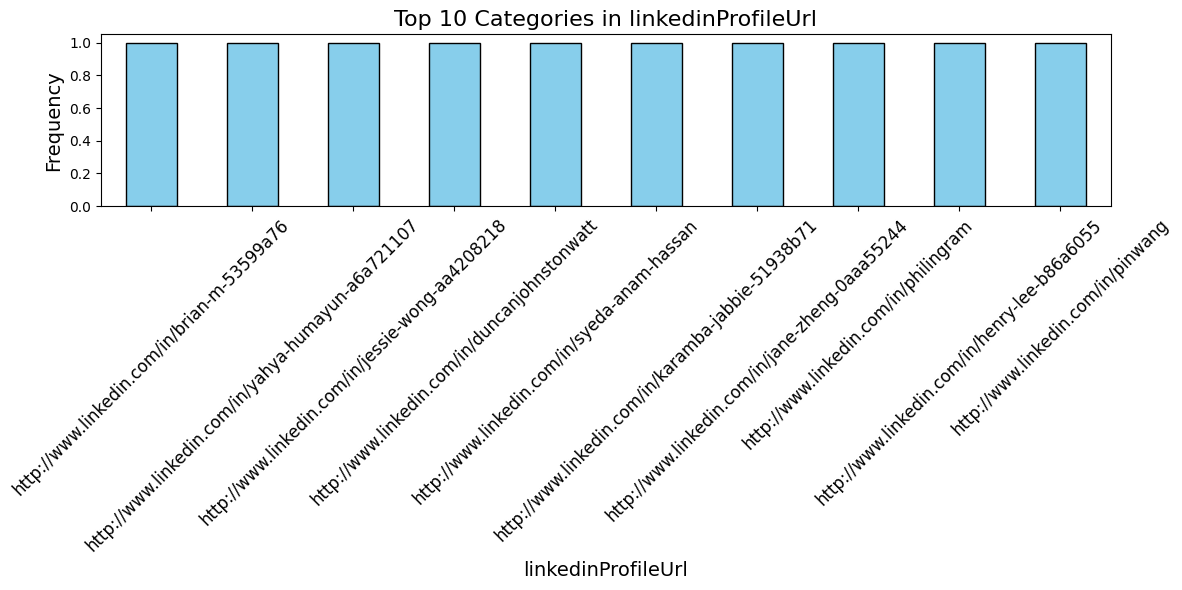


email - Unique Values: 2493
email
kushal@publshme.com            2
brian@credify.africa           1
vitaly@buzzoola.com            1
syeda.hassan@treslogics.com    1
karambaj@rsamade.co.za         1
janezheng@beliefbiomed.com     1
phil@superultra.io             1
henrylee@jobmatriz.com         1
yahya@thepattern.app           1
pinwang@mychinaroots.com       1
Name: count, dtype: int64


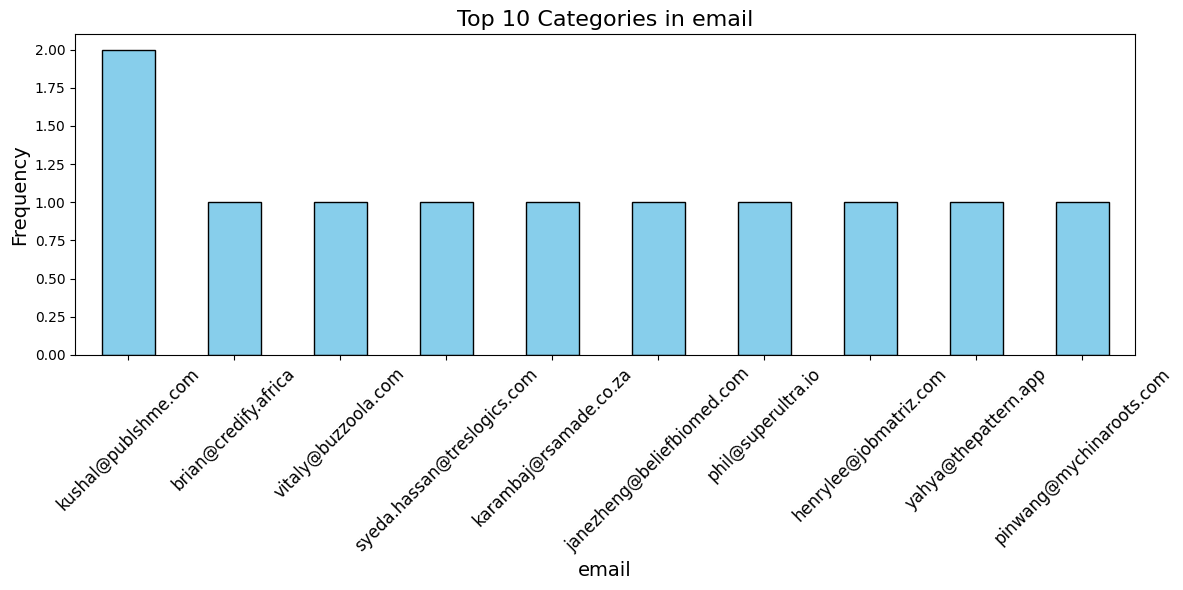


headline - Unique Values: 2257
headline
Founder & CEO       51
Founder and CEO     22
CEO & Founder       18
Co-Founder & CEO    18
Founder             12
Co-Founder & CTO     8
Co-Founder & COO     8
CEO & Co-Founder     7
CEO                  7
Director             5
Name: count, dtype: int64


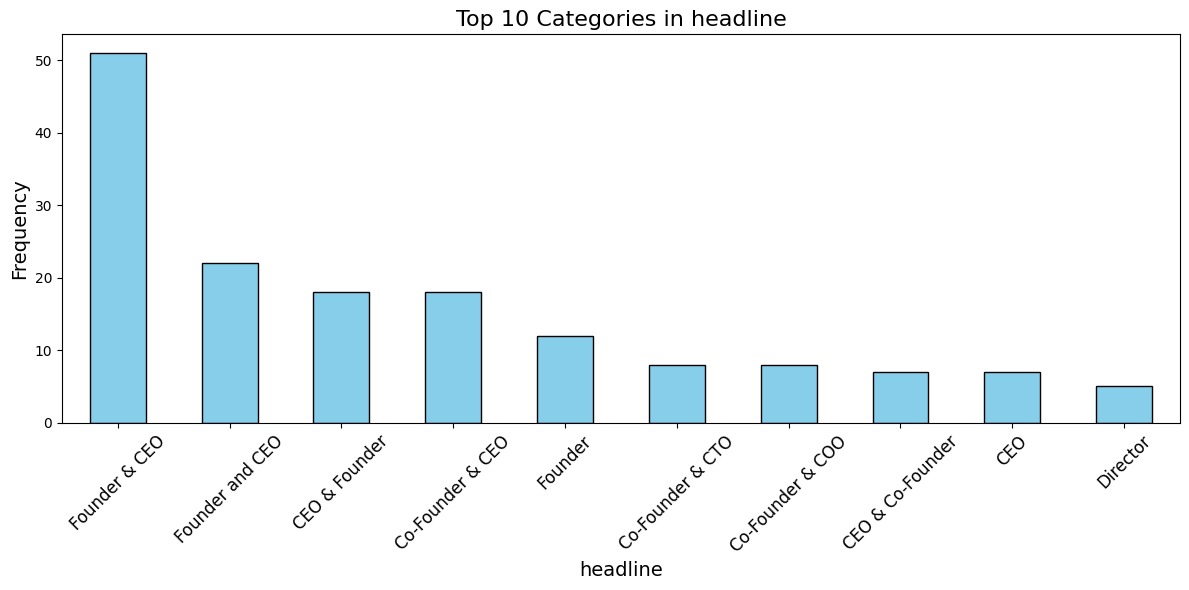


location - Unique Values: 160
location
Dubai, United Arab Emirates                      594
Hong Kong SAR                                    288
Hong Kong, Hong Kong SAR                         244
United Arab Emirates                             146
City of Johannesburg, Gauteng, South Africa      118
Riyadh, Saudi Arabia                             108
City of Cape Town, Western Cape, South Africa     90
Pakistan                                          74
Saudi Arabia                                      62
Lahore District, Punjab, Pakistan                 46
Name: count, dtype: int64


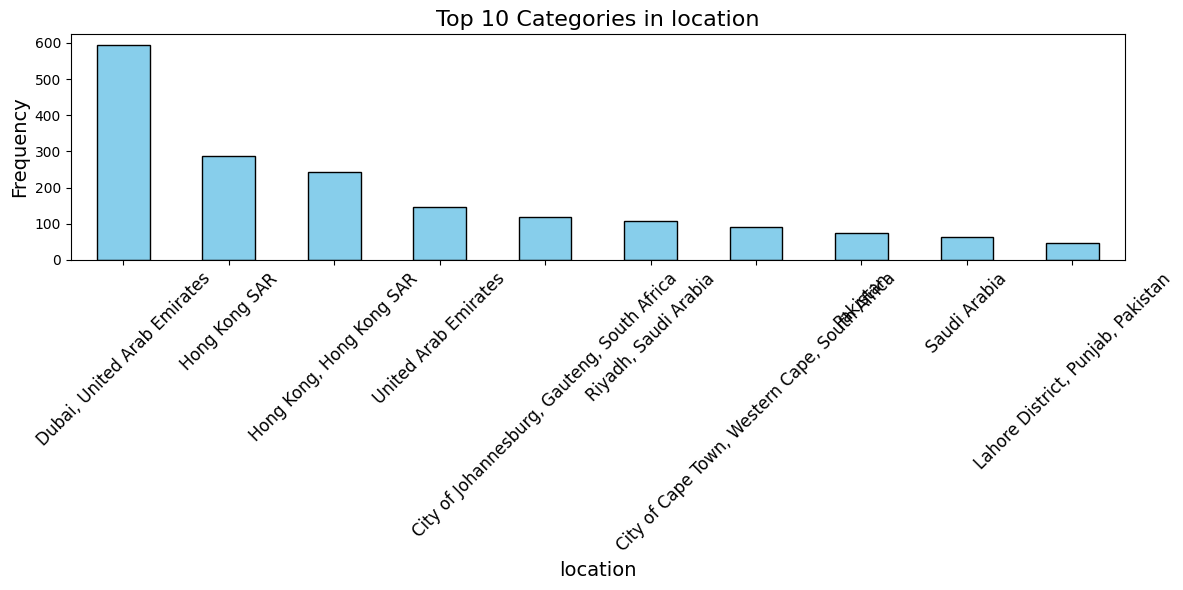


company - Unique Values: 2442
company
Klook                 3
Open Innovation AI    2
TerraPay              2
MediConCen            2
سويتر | Sweater       2
Alea 💚                2
Raj Solar             2
Metalpha              2
Sauda Store           2
OceanAir              2
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_14880\3561206739.py:25: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


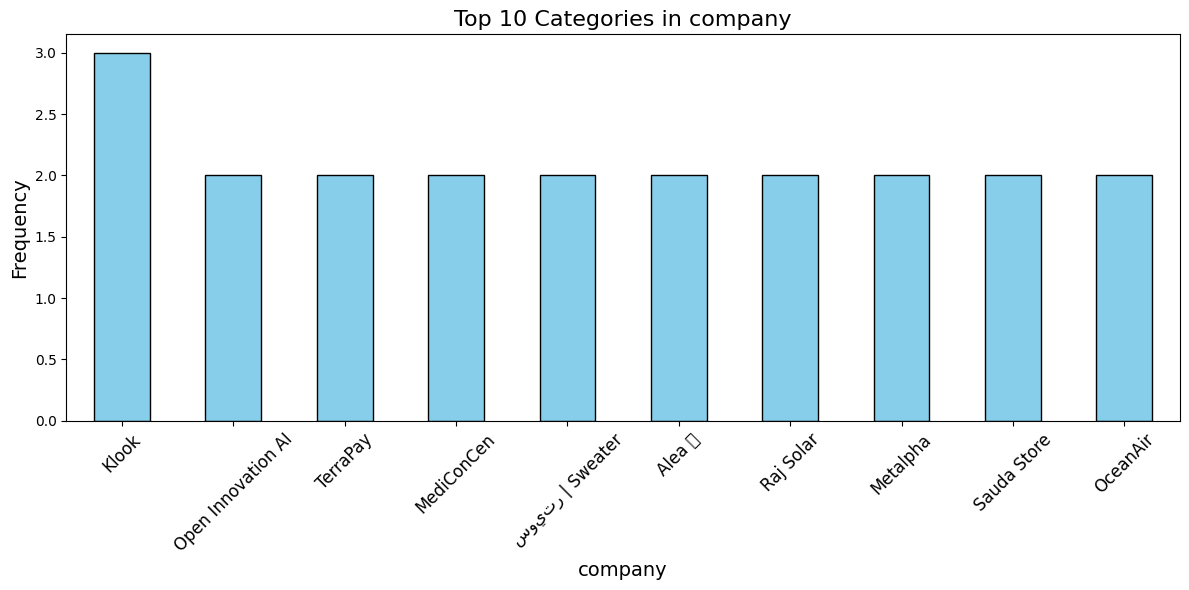


companyWebsite - Unique Values: 2447
companyWebsite
http://www.klook.com                3
http://www.unityretail.com          2
http://www.custonomy.io             2
http://www.angelflow.vc             2
http://www.wati.io                  2
http://www.briefco.co.za            2
http://www.meattn.com               2
http://www.sauda.store              2
http://www.endovisionai.com         2
http://www.reflectivelearning.co    2
Name: count, dtype: int64


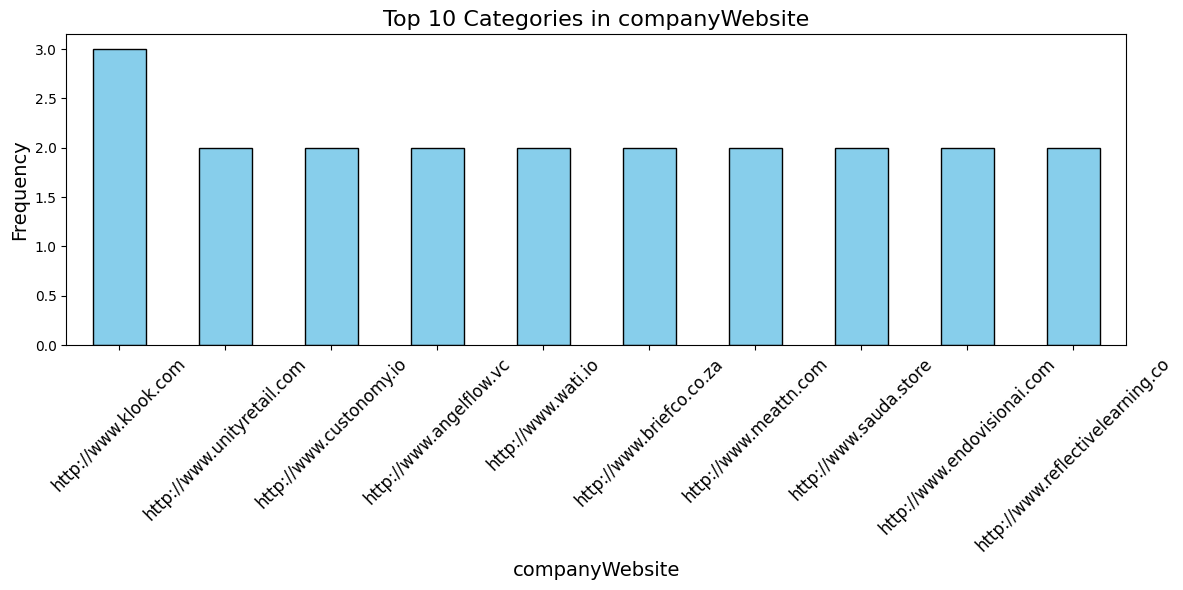


companyLinkedInUrl - Unique Values: 2439
companyLinkedInUrl
http://www.linkedin.com/company/klook                         3
http://www.linkedin.com/company/wearecollectiv                2
http://www.linkedin.com/company/watiglobal                    2
http://www.linkedin.com/company/sauda-store                   2
http://www.linkedin.com/company/meat-the-next                 2
http://www.linkedin.com/company/angelflow                     2
http://www.linkedin.com/company/endovision-ai-in-endoscopy    2
http://www.linkedin.com/company/reflectivelearning            2
http://www.linkedin.com/company/custonomy                     2
http://www.linkedin.com/company/open-innovation-ai            2
Name: count, dtype: int64


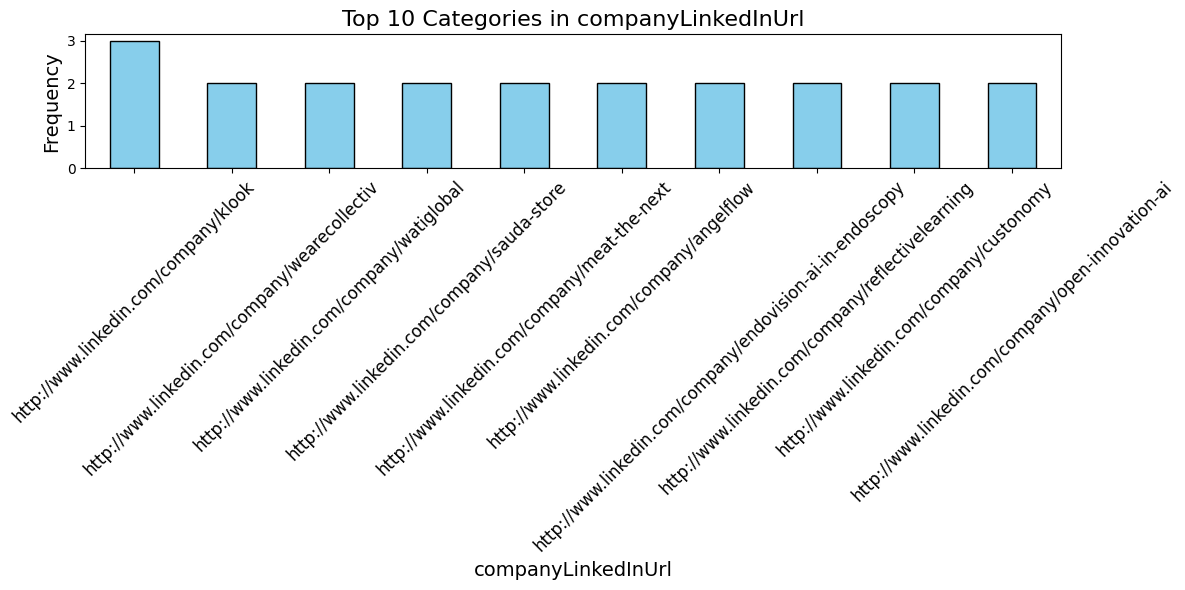


country - Unique Values: 7
country
United Arab Emirates    820
Hong Kong               595
South Africa            286
Pakistan                256
Saudi Arabia            215
China                   164
Qatar                    31
Name: count, dtype: int64


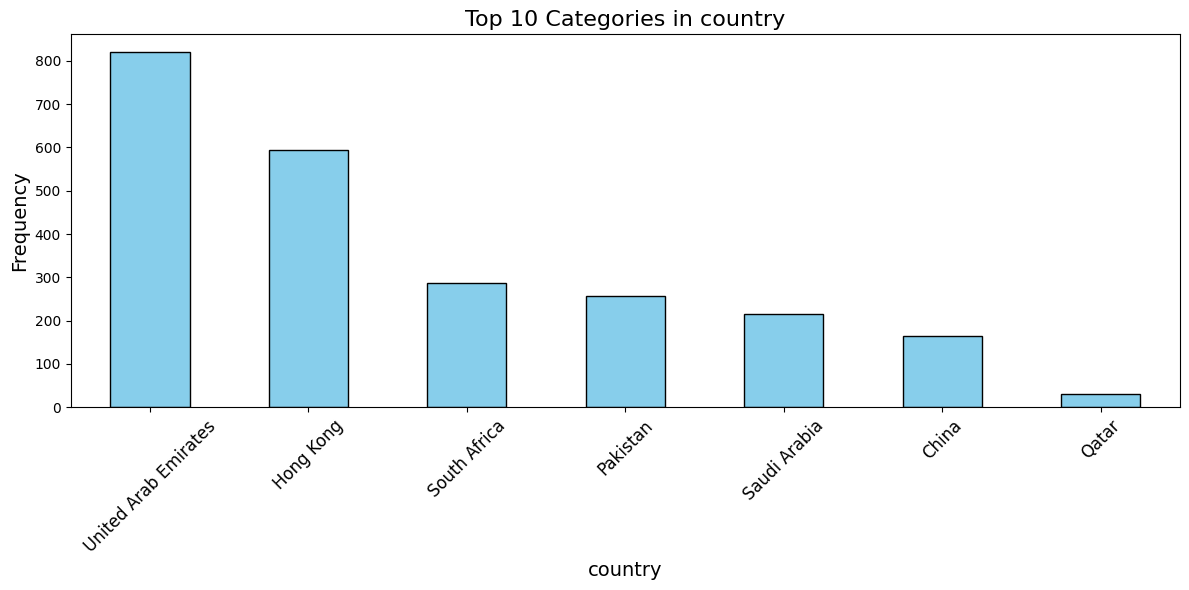

In [42]:
import matplotlib.pyplot as plt

# Define columns of interest (categorical data)
categorical_columns = [
    'linkedinProfileUrl', 'email', 'headline', 'location', 'company',
    'companyWebsite', 'companyLinkedInUrl', 'country']

# Loop through the columns and visualize their distributions
for col in categorical_columns:
    # Get value counts for the column and exclude "Unknown"
    value_counts = data[col].value_counts(dropna=False)
    value_counts = value_counts[value_counts.index != 'Unknown']  # Exclude "Unknown" entries

    # Display summary
    print(f"\n{col} - Unique Values: {value_counts.shape[0]}")
    print(value_counts.head(10))  # Display top 10 values for brevity

    # Plot bar chart for top 10 categories
    plt.figure(figsize=(12, 6))
    value_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 10 Categories in {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()
